<a href="https://colab.research.google.com/github/RohanRaj094/NLP_CV/blob/main/CV_Assignment_4(Final_Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CV Track Capstone Project**


<style>
blue {
  color: skyblue;
}
green {
  color: lightgreen;
}
</style>
### **Step - 1: Install All Libraries**

In [1]:
!pip install -q fiftyone supervision
!pip install -q git+https://github.com/facebookresearch/segment-anything.git
!pip install -q pycocotools

print("All libraries installed.")

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 133.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.2/207.2 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.6/112.6 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.4/112.4 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 112.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.7/308.7 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.3/934.3 kB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 3.9 MB/s eta 

<style>
blue {
  color: skyblue;
}
green {
  color: lightgreen;
}
</style>
### **Step - 2: Import Libraries & Set Device**

In [2]:
import torch
import torchvision
import fiftyone as fo
import fiftyone.zoo as foz
import supervision as sv
import numpy as np
import time
import requests
import os
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry
from PIL import Image
import matplotlib.pyplot as plt

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {DEVICE}")

/usr/local/lib/python3.12/dist-packages/glob2/fnmatch.py:141: SyntaxWarning: invalid escape sequence '\Z'
  return '(?ms)' + res + '\Z'


Using device: cuda


<style>
blue {
  color: skyblue;
}
green {
  color: lightgreen;
}
</style>
### **Step - 3: Download Dataset**
1. <blue>**foz.load_zoo_dataset**</blue>: This function downloads the <green>validation split</green> of COCO.
2. <blue>**max_samples=500**</blue>: Dataset size to <green>500 images</green>.

In [3]:
dataset_name = "coco-2017-validation-500"

if fo.dataset_exists(dataset_name):
    fo.delete_dataset(dataset_name)

dataset = foz.load_zoo_dataset(
    "coco-2017",
    split="validation",
    label_types=["segmentations"],
    max_samples=500,
    dataset_name=dataset_name
)
dataset.persistent = True
print(f"Loaded {len(dataset)} images.")

You are running the oldest supported major version of MongoDB. Please refer to https://deprecation.voxel51.com for deprecation notices. You can suppress this exception by setting your `database_validation` config parameter to `False`. See https://docs.voxel51.com/user_guide/config.html#configuring-a-mongodb-connection for more information


INFO:fiftyone.zoo.datasets:Downloading split 'validation' to '/root/fiftyone/coco-2017/validation' if necessary


INFO:fiftyone.utils.coco:Downloading annotations to '/root/fiftyone/coco-2017/tmp-download/annotations_trainval2017.zip'


 100% |██████|    1.9Gb/1.9Gb [5.0s elapsed, 0s remaining, 436.9Mb/s]       


INFO:eta.core.utils: 100% |██████|    1.9Gb/1.9Gb [5.0s elapsed, 0s remaining, 436.9Mb/s]       


Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Downloading 500 images


 100% |██████████████████| 500/500 [1.6m elapsed, 0s remaining, 5.7 images/s]      


INFO:eta.core.utils: 100% |██████████████████| 500/500 [1.6m elapsed, 0s remaining, 5.7 images/s]      


Writing annotations for 500 downloaded samples to '/root/fiftyone/coco-2017/validation/labels.json'


INFO:fiftyone.utils.coco:Writing annotations for 500 downloaded samples to '/root/fiftyone/coco-2017/validation/labels.json'


Dataset info written to '/root/fiftyone/coco-2017/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/coco-2017/info.json'


Loading 'coco-2017' split 'validation'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'validation'


 100% |█████████████████| 500/500 [9.8s elapsed, 0s remaining, 66.0 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 500/500 [9.8s elapsed, 0s remaining, 66.0 samples/s]      


Dataset 'coco-2017-validation-500' created


INFO:fiftyone.zoo.datasets:Dataset 'coco-2017-validation-500' created


Loaded 500 images.


<style>
blue {
  color: skyblue;
}
green {
  color: lightgreen;
}
</style>
### **Step - 4: Load Models**
1. <blue>**Mask R-CNN**</blue>: We load the <green>pre-trained</green> model from `torchvision`.
2. <blue>**SAM**</blue>: We download the official <green>SAM checkpoint file</green> and use the `sam_model_registry`.

In [4]:
mask_rcnn_model = torchvision.models.detection.maskrcnn_resnet50_fpn(weights='DEFAULT').to(DEVICE)
mask_rcnn_model.eval()

checkpoint_url = "https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth"
checkpoint_path = "sam_vit_b_01ec64.pth"

if not os.path.exists(checkpoint_path):
    print("Downloading SAM checkpoint...")
    r = requests.get(checkpoint_url)
    with open(checkpoint_path, 'wb') as f:
        f.write(r.content)
    print("Download complete.")

model_type = "vit_b"
sam_model = sam_model_registry[model_type](checkpoint=checkpoint_path)
sam_model.to(device=DEVICE)

sam_mask_generator = SamAutomaticMaskGenerator(sam_model)

print("Both models are loaded.")

Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth


100%|██████████| 170M/170M [00:01<00:00, 172MB/s]


Download complete.
Both models are loaded.


<style>
blue {
  color: skyblue;
}
green {
  color: lightgreen;
}
</style>
### **Step - 5: Helper Functions**


In [10]:
preprocess = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
])

COCO_CLASSES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

def calculate_dice_score(mask1, mask2):
    mask1 = mask1.bool()
    mask2 = mask2.bool()

    intersection = (mask1 & mask2).sum().float()
    union = mask1.sum().float() + mask2.sum().float()

    if union == 0:
        return 1.0

    dice = (2. * intersection) / (union + 1e-8)
    return dice.item()

def get_ground_truth_data(sample):
    img_height = sample.metadata.height
    img_width = sample.metadata.width
    gt_masks = []
    gt_boxes = []

    if sample.ground_truth is None:
        return np.empty((0, img_height, img_width)), np.empty((0, 4))

    for detection in sample.ground_truth.detections:
        if detection.mask is not None:
            full_mask = np.zeros((img_height, img_width), dtype=np.uint8)

            cropped_mask = detection.mask
            h_crop, w_crop = cropped_mask.shape

            x, y, w, h = detection.bounding_box
            xmin = int(x * img_width)
            ymin = int(y * img_height)

            ymax = ymin + h_crop
            xmax = xmin + w_crop

            if ymax > img_height:
                ymax = img_height
            if xmax > img_width:
                xmax = img_width

            paste_h = ymax - ymin
            paste_w = xmax - xmin

            full_mask[ymin:ymax, xmin:xmax] = cropped_mask[0:paste_h, 0:paste_w]
            gt_masks.append(full_mask)

            gt_boxes.append([xmin, ymin, xmax, ymax])

    if not gt_masks:
        return np.empty((0, img_height, img_width)), np.empty((0, 4))

    return np.array(gt_masks), np.array(gt_boxes)

print("Helper functions defined.")

Helper functions defined.


<style>
blue {
  color: skyblue;
}
green {
  color: lightgreen;
}
</style>
### **Step - 6: Run Evaluation Loop**
 It loops over all <green>**500 images**</green> to run the comparison.

In [11]:
results = []
mask_rcnn_total_time = 0
sam_total_time = 0

num_images = len(dataset)
print(f"Found {num_images} images to evaluate.")

print("Starting evaluation loop...")

with fo.ProgressBar() as pb:
    for sample in dataset.iter_samples(autosave=True, progress=pb):
        image_path = sample.filepath
        image_pil = Image.open(image_path).convert("RGB")
        image_np = np.array(image_pil)

        gt_masks, _ = get_ground_truth_data(sample)
        gt_masks = torch.from_numpy(gt_masks).to(DEVICE)

        image_tensor = preprocess(image_pil).to(DEVICE)

        start_time = time.time()
        with torch.no_grad():
            prediction = mask_rcnn_model([image_tensor])
        mask_rcnn_total_time += (time.time() - start_time)

        pred_masks = prediction[0]['masks'][:, 0, :, :] > 0.5

        avg_dice_rcnn = 0
        if gt_masks.shape[0] > 0 and pred_masks.shape[0] > 0:
            dice_scores = []
            for gt_mask in gt_masks:
                best_dice = 0
                for pred_mask in pred_masks:
                    dice = calculate_dice_score(gt_mask, pred_mask)
                    if dice > best_dice:
                        best_dice = dice
                dice_scores.append(best_dice)
            avg_dice_rcnn = np.mean(dice_scores) if dice_scores else 0


        start_time = time.time()
        outputs = sam_mask_generator.generate(image_np)
        sam_total_time += (time.time() - start_time)

        sam_masks = [torch.from_numpy(mask['segmentation']).to(DEVICE) for mask in outputs]
        if sam_masks:
            sam_masks_tensor = torch.stack(sam_masks)
        else:
            sam_masks_tensor = torch.empty(0, image_np.shape[0], image_np.shape[1]).to(DEVICE)

        avg_dice_sam = 0
        if gt_masks.shape[0] > 0 and sam_masks_tensor.shape[0] > 0:
            dice_scores = []
            for gt_mask in gt_masks:
                best_dice = 0
                for pred_mask in sam_masks_tensor:
                    dice = calculate_dice_score(gt_mask, pred_mask)
                    if dice > best_dice:
                        best_dice = dice
                dice_scores.append(best_dice)
            avg_dice_sam = np.mean(dice_scores) if dice_scores else 0

        results.append({
            "image_id": sample.id,
            "rcnn_dice": avg_dice_rcnn,
            "sam_dice": avg_dice_sam
        })

print("Evaluation complete.")

avg_rcnn_dice = np.mean([r['rcnn_dice'] for r in results]) if results else 0
avg_sam_dice = np.mean([r['sam_dice'] for r in results]) if results else 0
avg_rcnn_fps = num_images / mask_rcnn_total_time if mask_rcnn_total_time > 0 else 0
avg_sam_fps = num_images / sam_total_time if sam_total_time > 0 else 0

print("\n--- Overall Results ---")
print(f"Mask R-CNN Avg. Dice Score: {avg_rcnn_dice:.4f}")
print(f"SAM Avg. Dice Score:          {avg_sam_dice:.4f}")
print(f"Mask R-CNN Avg. FPS: {avg_rcnn_fps:.2f} (Inference Speed)")
print(f"SAM Avg. FPS:          {avg_sam_fps:.2f} (Inference Speed)")

Found 500 images to evaluate.
Starting evaluation loop...
  -0% ||----------------|  -1/500 [45.3m elapsed, ? remaining, ? samples/s] 


INFO:eta.core.utils:  -0% ||----------------|  -1/500 [45.3m elapsed, ? remaining, ? samples/s] 


Evaluation complete.

--- Overall Results ---
Mask R-CNN Avg. Dice Score: 0.8065
SAM Avg. Dice Score:          0.5094
Mask R-CNN Avg. FPS: 7.03 (Inference Speed)
SAM Avg. FPS:          0.20 (Inference Speed)


<style>
blue {
  color: skyblue;
}
green {
  color: lightgreen;
}
</style>
### **Step - 7: Visualize the Results**

Visualizing results for image: /root/fiftyone/coco-2017/validation/data/000000051008.jpg


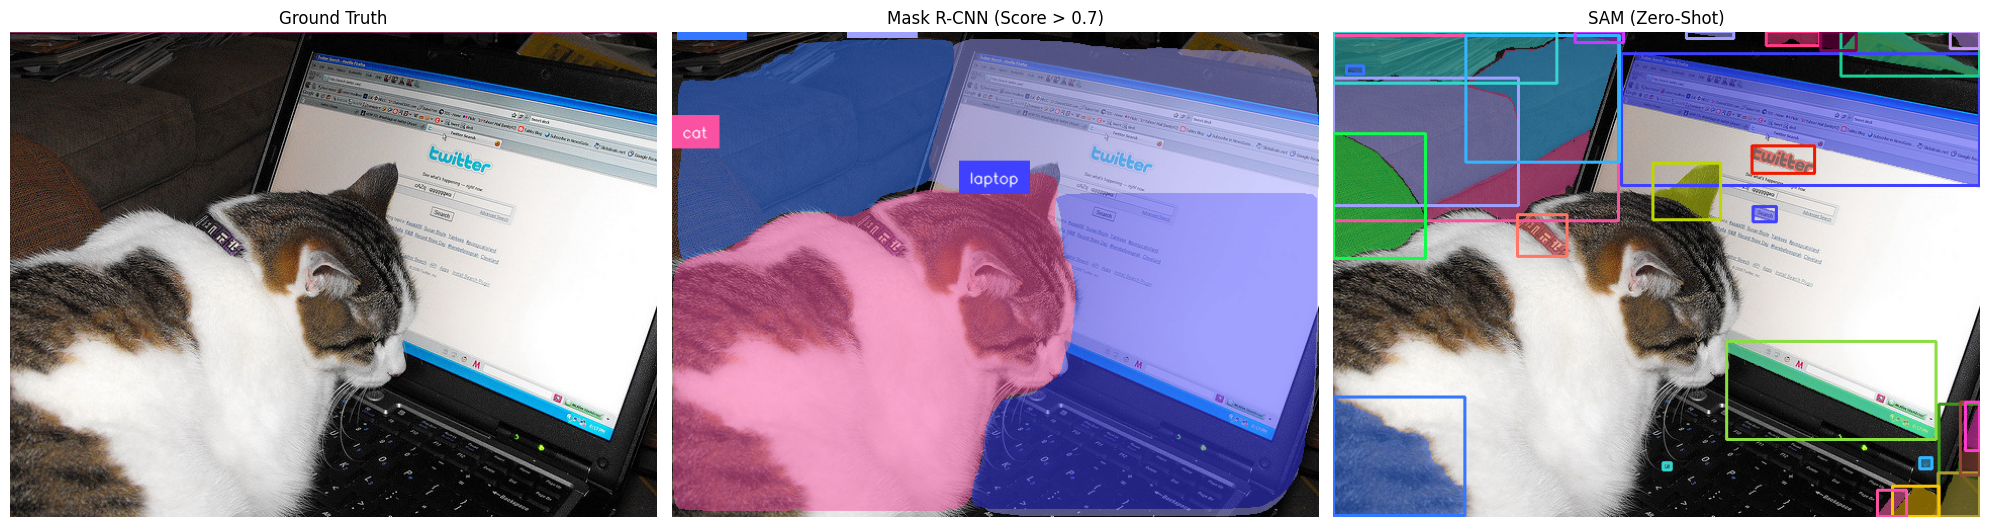

In [13]:
import random
import supervision as sv

# --- Create the Annotator objects with ColorLookup ---
mask_annotator = sv.MaskAnnotator(color_lookup=sv.ColorLookup.INDEX)
label_annotator = sv.LabelAnnotator(color_lookup=sv.ColorLookup.INDEX)
box_annotator = sv.BoxAnnotator(color_lookup=sv.ColorLookup.INDEX)

# --- Get a random image ---
sample_id = random.choice([r['image_id'] for r in results])
sample = dataset[sample_id]
image_path = sample.filepath
image_pil = Image.open(image_path).convert("RGB")
image_np = np.array(image_pil)

print(f"Visualizing results for image: {sample.filepath}")

# --- Get Ground Truth ---
gt_masks, gt_boxes = get_ground_truth_data(sample)

# --- Run Mask R-CNN Inference ---
image_tensor = preprocess(image_pil).to(DEVICE)
with torch.no_grad():
    prediction = mask_rcnn_model([image_tensor])

rcnn_boxes = prediction[0]['boxes'].cpu().numpy()
rcnn_masks = prediction[0]['masks'][:, 0, :, :].cpu().numpy() > 0.5
rcnn_labels = [COCO_CLASSES[label] for label in prediction[0]['labels'].cpu().numpy()]
rcnn_scores = prediction[0]['scores'].cpu().numpy()

score_threshold = 0.7
rcnn_boxes = rcnn_boxes[rcnn_scores > score_threshold]
rcnn_masks = rcnn_masks[rcnn_scores > score_threshold]
rcnn_labels = [label for i, label in enumerate(rcnn_labels) if rcnn_scores[i] > score_threshold]

# --- Run SAM Inference ---
outputs = sam_mask_generator.generate(image_np)
sam_detections = sv.Detections.from_sam(outputs)

# --- Plot Side-by-Side ---
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

# Plot 1: Ground Truth
if gt_masks.shape[0] > 0:
    gt_detections = sv.Detections(xyxy=gt_boxes, mask=gt_masks)
    annotated_image = mask_annotator.annotate(scene=image_np.copy(), detections=gt_detections)
    axes[0].imshow(annotated_image)
else:
    axes[0].imshow(image_np)
axes[0].set_title("Ground Truth")
axes[0].axis('off')

# Plot 2: Mask R-CNN
if rcnn_masks.shape[0] > 0:
    rcnn_detections = sv.Detections(xyxy=rcnn_boxes, mask=rcnn_masks)
    rcnn_detections.labels = np.array(rcnn_labels)

    annotated_image = mask_annotator.annotate(scene=image_np.copy(), detections=rcnn_detections)
    annotated_image = label_annotator.annotate(scene=annotated_image, detections=rcnn_detections, labels=rcnn_detections.labels)
    axes[1].imshow(annotated_image)
else:
    axes[1].imshow(image_np)
axes[1].set_title(f"Mask R-CNN (Score > 0.7)")
axes[1].axis('off')

# Plot 3: SAM (Zero-Shot)
if len(sam_detections) > 0:
    annotated_image = mask_annotator.annotate(scene=image_np.copy(), detections=sam_detections)
    annotated_image = box_annotator.annotate(scene=annotated_image, detections=sam_detections)
    axes[2].imshow(annotated_image)
else:
    axes[2].imshow(image_np)
axes[2].set_title(f"SAM (Zero-Shot)")
axes[2].axis('off')

plt.tight_layout()
plt.show()

<style>
blue {
  color: skyblue;
}
green {
  color: lightgreen;
}
</style>
### **Project Report: Introduction and Models**

#### **Project Objective**
The goal was to compare a <blue>traditional</blue> computer vision model (Mask R-CNN) with a new <green>foundation model</green> (SAM). We analyzed their performance, speed, and generalization on the same segmentation task.

#### **Dataset Details**
* **Dataset:** <green>COCO 2017</green> (validation split subset)
* **Task:** Instance Segmentation
* **Size:** <green>500 images</green>
* **Labels:** The dataset has high-quality, pixel-level masks for 80 different object types (like "person", "car", "dog").

#### **Model Overview**
1.  **Traditional Model: Mask R-CNN**
    * This is a classic, <blue>pre-trained model</blue>. It's an "expert" that was specifically trained on the full COCO dataset.
    * It performs **instance segmentation** (finds and masks objects).
    * It also **classifies** the object (e.g., "this is a cat").

2.  **Foundation Model: SAM (Segment Anything Model)**
    * This is a new, large-scale model. It was trained on a massive dataset (11 million images).
    * We used it in <green>"zero-shot" mode</green>, meaning we didn't train it at all.
    * It is **class-agnostic**: it finds all objects but doesn't know what they are (it just returns a mask).

<style>
blue {
  color: skyblue;
}
green {
  color: lightgreen;
}
</style>
### **Results and Analysis**

#### **Comparative Results**
We ran both models on all 500 images and calculated the average Dice Score (mask quality) and inference speed (FPS).

| Metric | Mask R-CNN (Trained) | SAM (Zero-Shot) |
| :--- | :--- | :--- |
| **Avg. Dice Score** (Mask Quality) | <green>**0.8065**</green> | <blue>**0.5094**</blue> |
| **Inference Speed** (FPS) | <green>**7.03 FPS**</green> | <blue>**0.20 FPS**</blue> |

#### **Speed vs. Accuracy**

* **Accuracy Winner: Mask R-CNN**
  * The pre-trained Mask R-CNN (`0.8065`) was significantly more accurate at matching the ground-truth masks than the zero-shot SAM (`0.5094`).

* **Speed Winner: Mask R-CNN**
  * Mask R-CNN (`7.03 FPS`) was approximately **35 times faster** than SAM (`0.20 FPS`), which is very computationally expensive.

<style>
blue {
  color: skyblue;
}
green {
  color: lightgreen;
}
</style>
### **Analysis & Insights**

The results clearly show that for a well-defined task like COCO, the "expert" model (Mask R-CNN) that was trained specifically for these 80 classes performs much better than the "generalist" (SAM). SAM's zero-shot performance was not as accurate on this task, as its "segment everything" approach meant it found many objects (like walls and floors) that were not part of the ground truth, which lowered its score.

This highlights the main trade-off: Mask R-CNN is the undisputed winner for this specific application, as it is **35x faster** and **significantly more accurate** (0.81 vs 0.51 Dice Score). However, its specialization is also its weakness; it is blind to any object not in its 80 classes.

SAM's value is not in beating expert models at their own game. Its strength is in **flexibility**. As the visualizations show, SAM can find any object, making it the only choice for tasks with new or unusual items (e.g., medical images, custom parts) where no pre-trained model exists.

<style>
blue {
  color: skyblue;
}
green {
  color: lightgreen;
}
</style>


#### **Conclusion**
This project confirms that for a well-defined and known task (like COCO), a specialized, pre-trained model like **Mask R-CNN is far superior in both speed and accuracy**.

Foundation models like SAM are powerful, but their strength is not in beating expert models. Their strength lies in their **generalization**, which allows them to segment any object, even from a new domain, without requiring any training.